In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import string
import seaborn as sns
import numpy as np

/opt/homebrew/anaconda3/envs/puzzle_local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Figure2:Panel A

In [2]:
# R5before_human.csv indicates the top five groups with the lowest RMSD in the human group.
# R5after_human.csv indicates the groups that are not in the top 5 RMSD rankings, covering the remaining groups.
# solution_clash.csv represents the clash score of the solution, mainly obtained by running the MolProbity program(Chen VB, Arendall WB 3rd, Headd JJ, et al. Acta Crystallogr D Biol Crystallogr. 2010;66(Pt 1):12-21. doi:10.1107/S0907444909042073) .
R5before_human=pd.read_csv('/Users/bf/Documents/GitHub/PuzzlesRoundV/scores/Figure2/R5before_human.csv')
R5after_human=pd.read_csv('/Users/bf/Documents/GitHub/PuzzlesRoundV/scores/Figure2/R5after_human.csv')
df_solution_clash=pd.read_csv('/Users/bf/Documents/GitHub/PuzzlesRoundV/scores/Figure2/solution_clash.csv')

In [3]:
# It does not display the TM scores for 'PZ22', 'PZ22Dimer', 'PZ26', 'PZ27', 'PZ28', so other values are set instead.
R5before_human_tm=R5before_human.copy()
R5before_human_tm.loc[R5before_human_tm['PZ'].isin(['PZ22','PZ22Dimer','PZ26','PZ27', 'PZ28']), ['TM' ]] = 1000
R5after_human_tm=R5after_human.copy()
R5after_human_tm.loc[R5after_human_tm['PZ'].isin(['PZ22','PZ22Dimer','PZ26','PZ27', 'PZ28']), ['TM']] = 1000

In [31]:
group_color={'Das': '#d62728',
 'Chen': '#1f77b4',
 'Szachniuk': '#9467bd',
 'Bujnicki': '#2ca02c',
 'Xiao': '#ff7f0e',
 'Ding': '#bcbd22',
 'Dokholyan': '#8c564b',
 'Kollmann': '#e377c2',
 'Perez': '#d6bcc0',
 'Nithin': 'e377c2',
 'Lee': '#7f7f7f',
 'Yang': '#17becf',
 'SoutheRNA': '#ff9896',
 'Anonymous': '#f7b6d2',
 'Boniecki': '#f0b98d',
 'Xiong': '#c49c94',
 'YagoubAli': '#9edae5',
 'DiMaio': '#aec7e8',
 'Others': '#e4e4e4',
 'RNAComposer': '#9467bd',
 '3dRNA': '#ff7f0e',
 'LeeAS': '#7f7f7f',
 'SimRNA': '#2ca02c',
 'RW3D': '#d62728'}
group_sort={'Das': 1, 'Chen': 2, 'Szachniuk': 3, 'Bujnicki': 4, 'Xiao': 5, 'Ding': 6, 'Dokholyan': 7, 'Kollmann': 8, 'Perez': 9, 'Nithin': 10, 'Lee': 11, 'Yang': 12, 'SoutheRNA': 13, 'Anonymous': 14, 'Boniecki': 15, 'Xiong': 16, 'YagoubAli': 17, 'DiMaio': 18, 'Others': 1000, 'RNAComposer': 1, 'SimRNA': 2, 'RW3D': 3, '3dRNA': 4, 'LeeAS': 5}

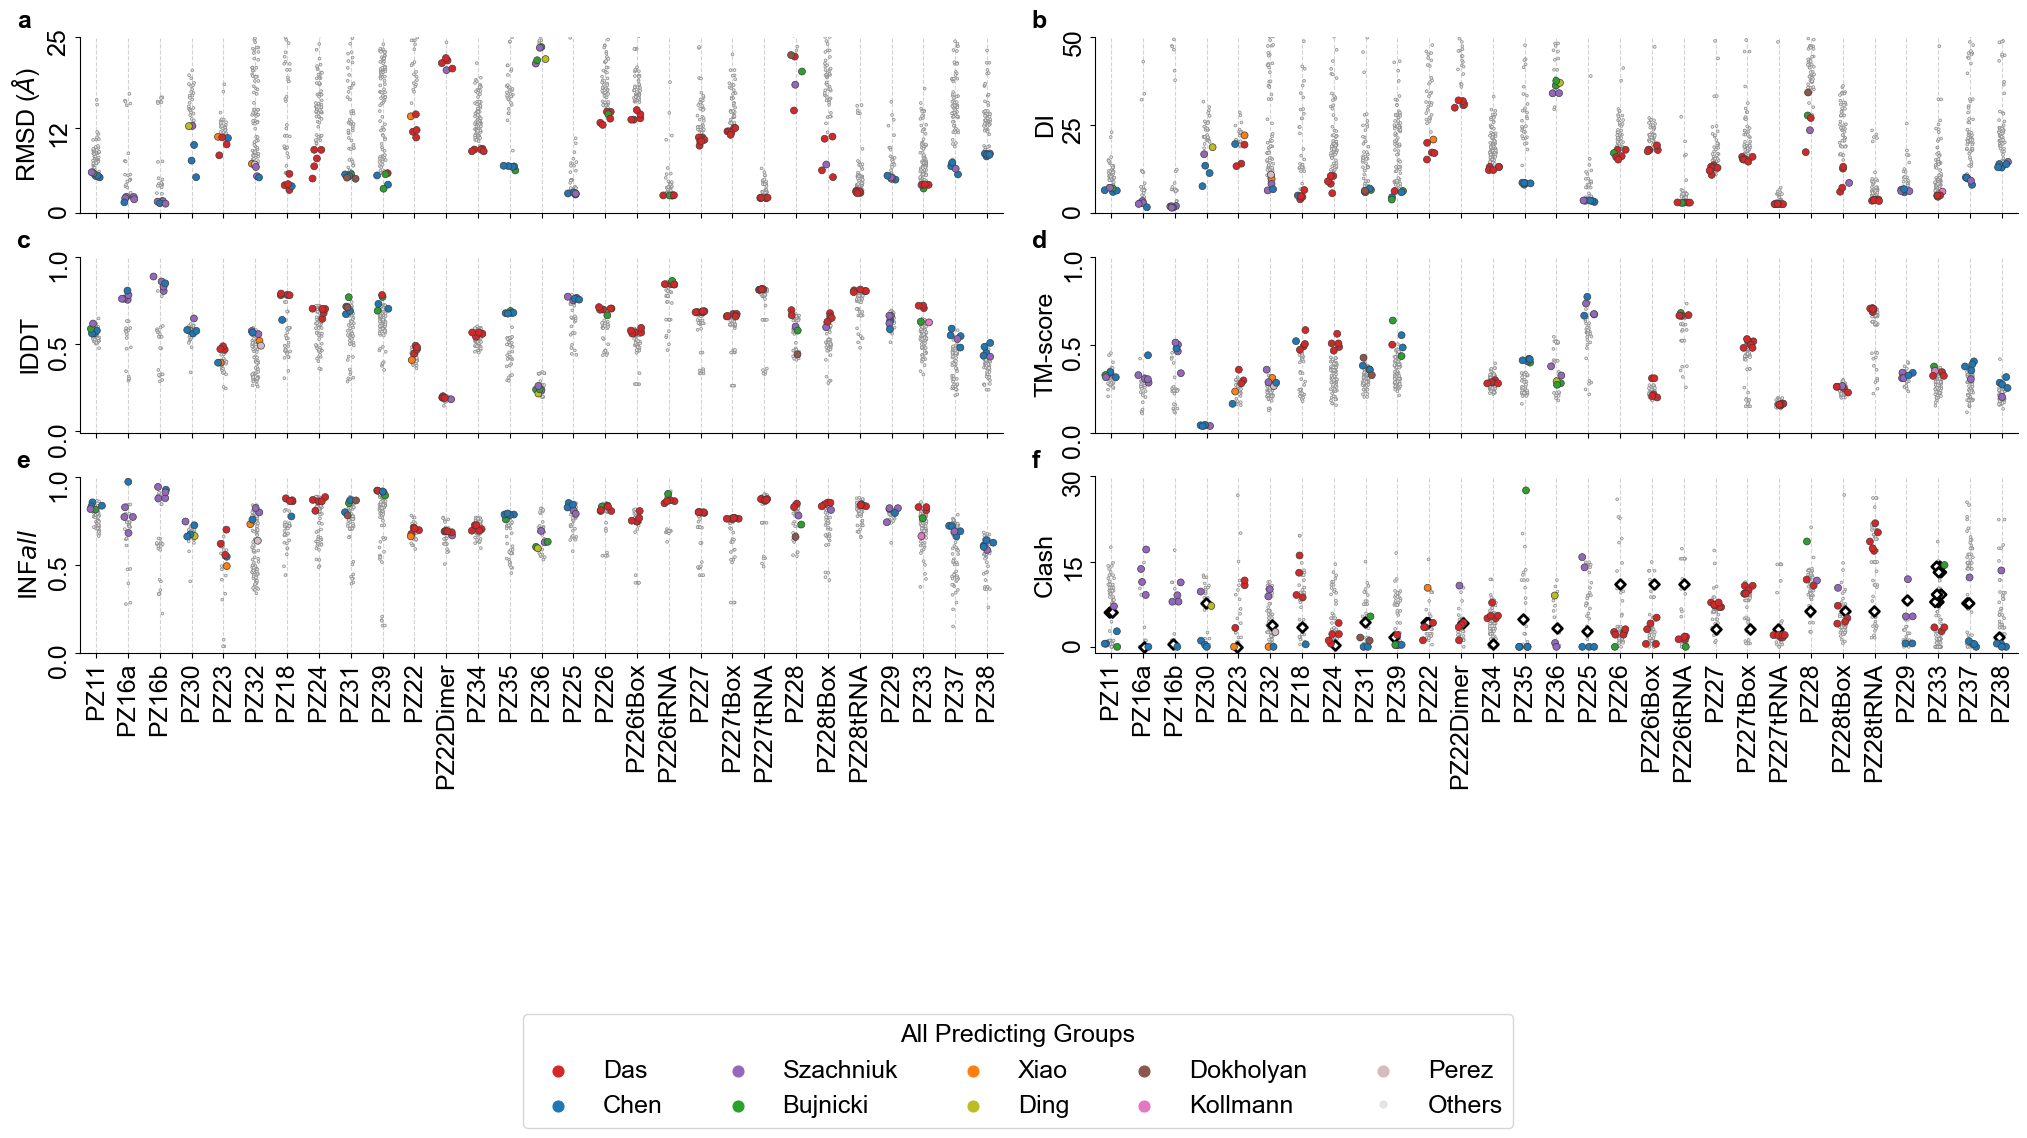

In [34]:
from matplotlib import pyplot as plt
import matplotlib
from matplotlib import gridspec
import seaborn as sns
# Classify the column "category1" according to specified rules.
def sort_legend(labels1,handles1,group_sort):
    sorted_indices = sorted(range(len(labels1)), key=lambda x: group_sort[labels1[x]])
    sorted_labels = [labels1[i] for i in sorted_indices]
    sorted_handles = [handles1[i] for i in sorted_indices]
    return [sorted_handles,sorted_labels]


matplotlib.rcParams.update({'font.size': 18})
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2,sharex=True, figsize=(25, 8))


sns.despine()
ax1=sns.stripplot(x='PZ',y='RMSD',data=R5after_human,linewidth=0.5, color='#e4e4e4', ax=ax1,size=2)
ax1=sns.stripplot(x='PZ',y='RMSD',data=R5before_human,linewidth=0.5, palette=group_color,hue='Groups_new', ax=ax1,jitter=0.2)
ax1.set_xlabel("")
ax1.set_ylim(0,25.03)
ax1.set_yticks([0,12,25])
ax1.set_ylabel("RMSD ($\AA$)")
ax1.annotate('a', (-2.5,1.05), size=18, xycoords=ax1.get_xaxis_transform(), weight='bold')
ax1.tick_params(rotation=90)
ax1.legend_.remove()

ax2=sns.stripplot(x='PZ',y='DI',data=R5after_human,linewidth=0.5, color='#e4e4e4', ax=ax2,size=2)
ax2=sns.stripplot(x='PZ',y='DI',data=R5before_human,linewidth=0.5, palette=group_color,hue='Groups_new', ax=ax2,jitter=0.2)
ax2.set_xlabel("")
ax2.set_ylabel("DI")
ax2.set_ylim(0, 50)
ax2.set_yticks([0,25,50])
ax2.annotate('b', (-2.5,1.05), size=18, xycoords=ax2.get_xaxis_transform(), weight='bold')
ax2.tick_params(rotation=90)
ax2.legend_.remove()


ax3=sns.stripplot(x='PZ',y='Lddt_score',data=R5after_human,linewidth=0.5, color='#e4e4e4', ax=ax3,size=2)
ax3=sns.stripplot(x='PZ',y='Lddt_score',data=R5before_human,linewidth=0.5, palette=group_color,hue='Groups_new', ax=ax3,jitter=0.2)

ax3.set_xlabel("")
ax3.set_ylabel("lDDT")
ax3.set_ylim(-0.01, 1)
ax3.set_yticks([0,0.5,1])
ax3.annotate('c', (-2.5,1.05), size=18, xycoords=ax3.get_xaxis_transform(), weight='bold')
ax3.tick_params(rotation=90)
ax3.legend_.remove()



ax4=sns.stripplot(x='PZ',y='TM',data=R5after_human_tm,linewidth=0.5, color='#e4e4e4', ax=ax4,size=2)
ax4=sns.stripplot(x='PZ',y='TM',data=R5before_human_tm,linewidth=0.5, palette=group_color,hue='Groups_new', ax=ax4,jitter=0.2)
ax4.set_xlabel("")
ax4.set_ylabel("TM-score")
ax4.set_ylim(0, 1)
ax4.set_yticks([0,0.5,1])
ax4.annotate('d', (-2.5,1.05), size=18, xycoords=ax4.get_xaxis_transform(), weight='bold')
ax4.tick_params(rotation=90)
ax4.legend_.remove()

ax5=sns.stripplot(x='PZ',y='INF_all',data=R5after_human,linewidth=0.5, color='#e4e4e4', ax=ax5,size=2)
ax5=sns.stripplot(x='PZ',y='INF_all',data=R5before_human,linewidth=0.5, palette=group_color,hue='Groups_new', ax=ax5,jitter=0.2)
ax5.set_xlabel("")
ax5.set_ylabel("INF$all$")
ax5.set_ylim(0, 1)
ax5.set_yticks([0,0.5,1])
ax5.annotate('e', (-2.5,1.05), size=18, xycoords=ax5.get_xaxis_transform(), weight='bold')
ax5.tick_params(rotation=90)
ax5.legend_.remove()



ax6=sns.stripplot(x='PZ',y='clash',data=R5after_human,linewidth=0.5, color='#e4e4e4', ax=ax6,size=2)
ax6=sns.stripplot(x='Category', y='Value',data=df_solution_clash, color='white', marker='D', edgecolor='black', linewidth=2)
ax6=sns.stripplot(x='PZ',y='clash',data=R5before_human,linewidth=0.5, palette=group_color,hue='Groups_new', ax=ax6,jitter=0.2)

ax6.set_xlabel("")
ax6.set_ylabel("Clash")
ax6.set_ylim(-1, 30)
ax6.set_yticks([0,15,30])
ax6.annotate('f', (-2.5,1.05), size=18, xycoords=ax6.get_xaxis_transform(), weight='bold')
ax6.tick_params(rotation=90)
ax6.legend_.remove()






# Set the x-axis gridlines
ax1.xaxis.grid(True, linestyle='--', color='lightgray')
ax2.xaxis.grid(True, linestyle='--', color='lightgray')
ax3.xaxis.grid(True, linestyle='--', color='lightgray')
ax4.xaxis.grid(True, linestyle='--', color='lightgray')
ax5.xaxis.grid(True, linestyle='--', color='lightgray')
ax6.xaxis.grid(True, linestyle='--', color='lightgray')


handles, labels = [], []

for ax in [ax1, ax2,ax3,ax4,ax5,ax6]:
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

handles.append(plt.Line2D([], [], marker='o', markersize=5, label='Others', color='#e4e4e4', linestyle='None'))
labels.append('Others')

    
    
# 2. & 3. Merge these handles and labels, and remove duplicates.
legend_dict = dict(zip(labels, handles))  #Use a dictionary to remove duplicates, retaining the last occurrence of the handle.
labels_unique = list(legend_dict.keys())
handles_unique = [legend_dict[label] for label in labels_unique]

# Show legend

fig.legend(sort_legend(labels_unique,handles_unique,group_sort)[0],sort_legend(labels_unique,handles_unique,group_sort)[1], title="All Predicting Groups", loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=5, prop={'size': 18},markerscale=1)


plt.subplots_adjust(hspace=0.25, wspace=0.1)

#fig.legend(sorted_handles, sorted_labels, title="All predicted groups",loc='lower center',ncol=len(labels4)//2, bbox_to_anchor=(0.5, -0.15),fontsize=10)
plt.savefig("/Users/bf/Documents/GitHub/PuzzlesRoundV/figures/Figure2/Figure2_pannelA.pdf",bbox_inches='tight')
plt.show()


# Figur2:Panel B

In [42]:
df_human_sorted

,Groups,model,RMSD,RMSD_rank,DI,DI_rank,INF_all,INF_all_rank,INF_wc,INF_wc_rank,...,TM,TM_rank,GDT,GDT_rank,p-value,solution,PZ,length,Groups_new,length_shift
0,Chen,5,4.989,1,5.852,1,0.853,3,0.953,17,...,0.339,14,0.0,1,0.000000e+00,0,PZ11,57,Chen,57.615692
1,Chen,6,8.355,30,10.521,29,0.794,18,0.914,21,...,0.318,28,0.0,1,1.720000e-12,1,PZ11,57,Chen,55.807862
2,Chen,8,8.415,31,10.097,22,0.833,5,0.978,4,...,0.332,19,0.0,1,2.180000e-12,1,PZ11,57,Chen,58.326472
3,Ding,1,8.417,32,11.643,38,0.723,40,0.826,32,...,0.272,48,0.0,1,2.190000e-12,1,PZ11,57,Ding,56.488929
4,Das,4,8.475,33,9.827,19,0.862,1,1.000,1,...,0.253,51,0.0,1,2.750000e-12,0,PZ11,57,Das,58.010392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,DasFARFAR2Holo,1,11.633,15,18.171,14,0.640,10,0.923,3,...,0.193,37,0.0,1,5.678000e-07,0,PZ38,53,Das,52.750674
1601,DasARESApo,5,11.633,15,18.171,14,0.640,10,0.923,3,...,0.193,37,0.0,1,5.678000e-07,0,PZ38,53,Das,52.438066
1602,SoutheRNA,1,11.503,14,17.325,13,0.664,4,0.964,1,...,0.252,11,0.0,1,3.935000e-07,0,PZ38,53,SoutheRNA,53.676654
1603,Bujnicki,5,16.766,55,28.674,51,0.585,35,0.874,30,...,0.213,27,0.0,1,2.198000e-02,0,PZ38,53,Bujnicki,53.955080


# Figure3: Panel A

In [41]:

df_human_sorted=pd.read_csv('/Users/bf/Documents/GitHub/PuzzlesRoundV/scores/Figure3/df_human_sorted.csv')
##### human
df_human_sorted['length_shift']=df_human_sorted['length']+ np.random.uniform(-1.5, 1.5, len(df_human_sorted))
df_RNA_elements = df_human_sorted[(df_human_sorted['PZ'] == 'PZ11') | (df_human_sorted['PZ'] == 'PZ16a')| (df_human_sorted['PZ'] == 'PZ16b')| (df_human_sorted['PZ'] == 'PZ30')]
df_aptamers = df_human_sorted[(df_human_sorted['PZ'] == 'PZ23') | (df_human_sorted['PZ'] == 'PZ32')]
df_viral_elements = df_human_sorted[(df_human_sorted['PZ'] == 'PZ18') | (df_human_sorted['PZ'] == 'PZ24')| (df_human_sorted['PZ'] == 'PZ31')| (df_human_sorted['PZ'] == 'PZ39')]
df_ribozymes = df_human_sorted[(df_human_sorted['PZ'] == 'PZ34') | (df_human_sorted['PZ'] == 'PZ35')| (df_human_sorted['PZ'] == 'PZ36')| (df_human_sorted['PZ'] == 'PZ22')| (df_human_sorted['PZ'] == 'PZ22Dimer')]
df_riboswitches = df_human_sorted[(df_human_sorted['PZ'] == 'PZ25') | (df_human_sorted['PZ'] == 'PZ29')| (df_human_sorted['PZ'] == 'PZ33')| (df_human_sorted['PZ'] == 'PZ37')| (df_human_sorted['PZ'] == 'PZ38')| (df_human_sorted['PZ'] == 'PZ26')| (df_human_sorted['PZ'] == 'PZ26tBox')| (df_human_sorted['PZ'] == 'PZ26tRNA')
                    | (df_human_sorted['PZ'] == 'PZ27')| (df_human_sorted['PZ'] == 'PZ27tBox')| (df_human_sorted['PZ'] == 'PZ27tRNA')| (df_human_sorted['PZ'] == 'PZ28')| (df_human_sorted['PZ'] == 'PZ28tBox')| (df_human_sorted['PZ'] == 'PZ28tRNA')]

def sort_legend(labels1,handles1):
    sorted_indices = sorted(range(len(labels1)), key=lambda x: group_sort[labels1[x]])
    sorted_labels = [labels1[i] for i in sorted_indices]
    sorted_handles = [handles1[i] for i in sorted_indices]
    return [sorted_handles,sorted_labels]

In [49]:
color_map={'Das': '#d62728',
 'Bujnicki': '#1f77b4',
 'Chen': '#9467bd',
 'Adamiak': '#2ca02c',
 'Xiao': '#ff7f0e',
 'Dokholyan': '#bcbd22',
 'Ding': '#8c564b',
 'Szachniuk': '#98df8a',
 'Perez': '#ffbb78',
 'Lee': '#e377c2',
 'Nithin': '#7f7f7f',
 'Yang': '#17becf',
 'SoutheRNA': '#ff9896',
 'Kollmann': '#f7b6d2',
 'Zhou': '#f0b98d',
 'Boniecki': '#c49c94',
 'Xiong': '#9edae5',
 'YagoubAli': '#aec7e8',
 'DiMaio': '#c5b0d5',
 'Anonymous': '#dbdb8d',
 'Szach/Adam': '#2ca02c',
 'RNAComposer': '#2ca02c',
 '3dRNA': '#ff7f0e',
 'LeeAS': '#e377c2',
 'SimRNA': '#1f77b4',
 'RW3D': '#d62728'}

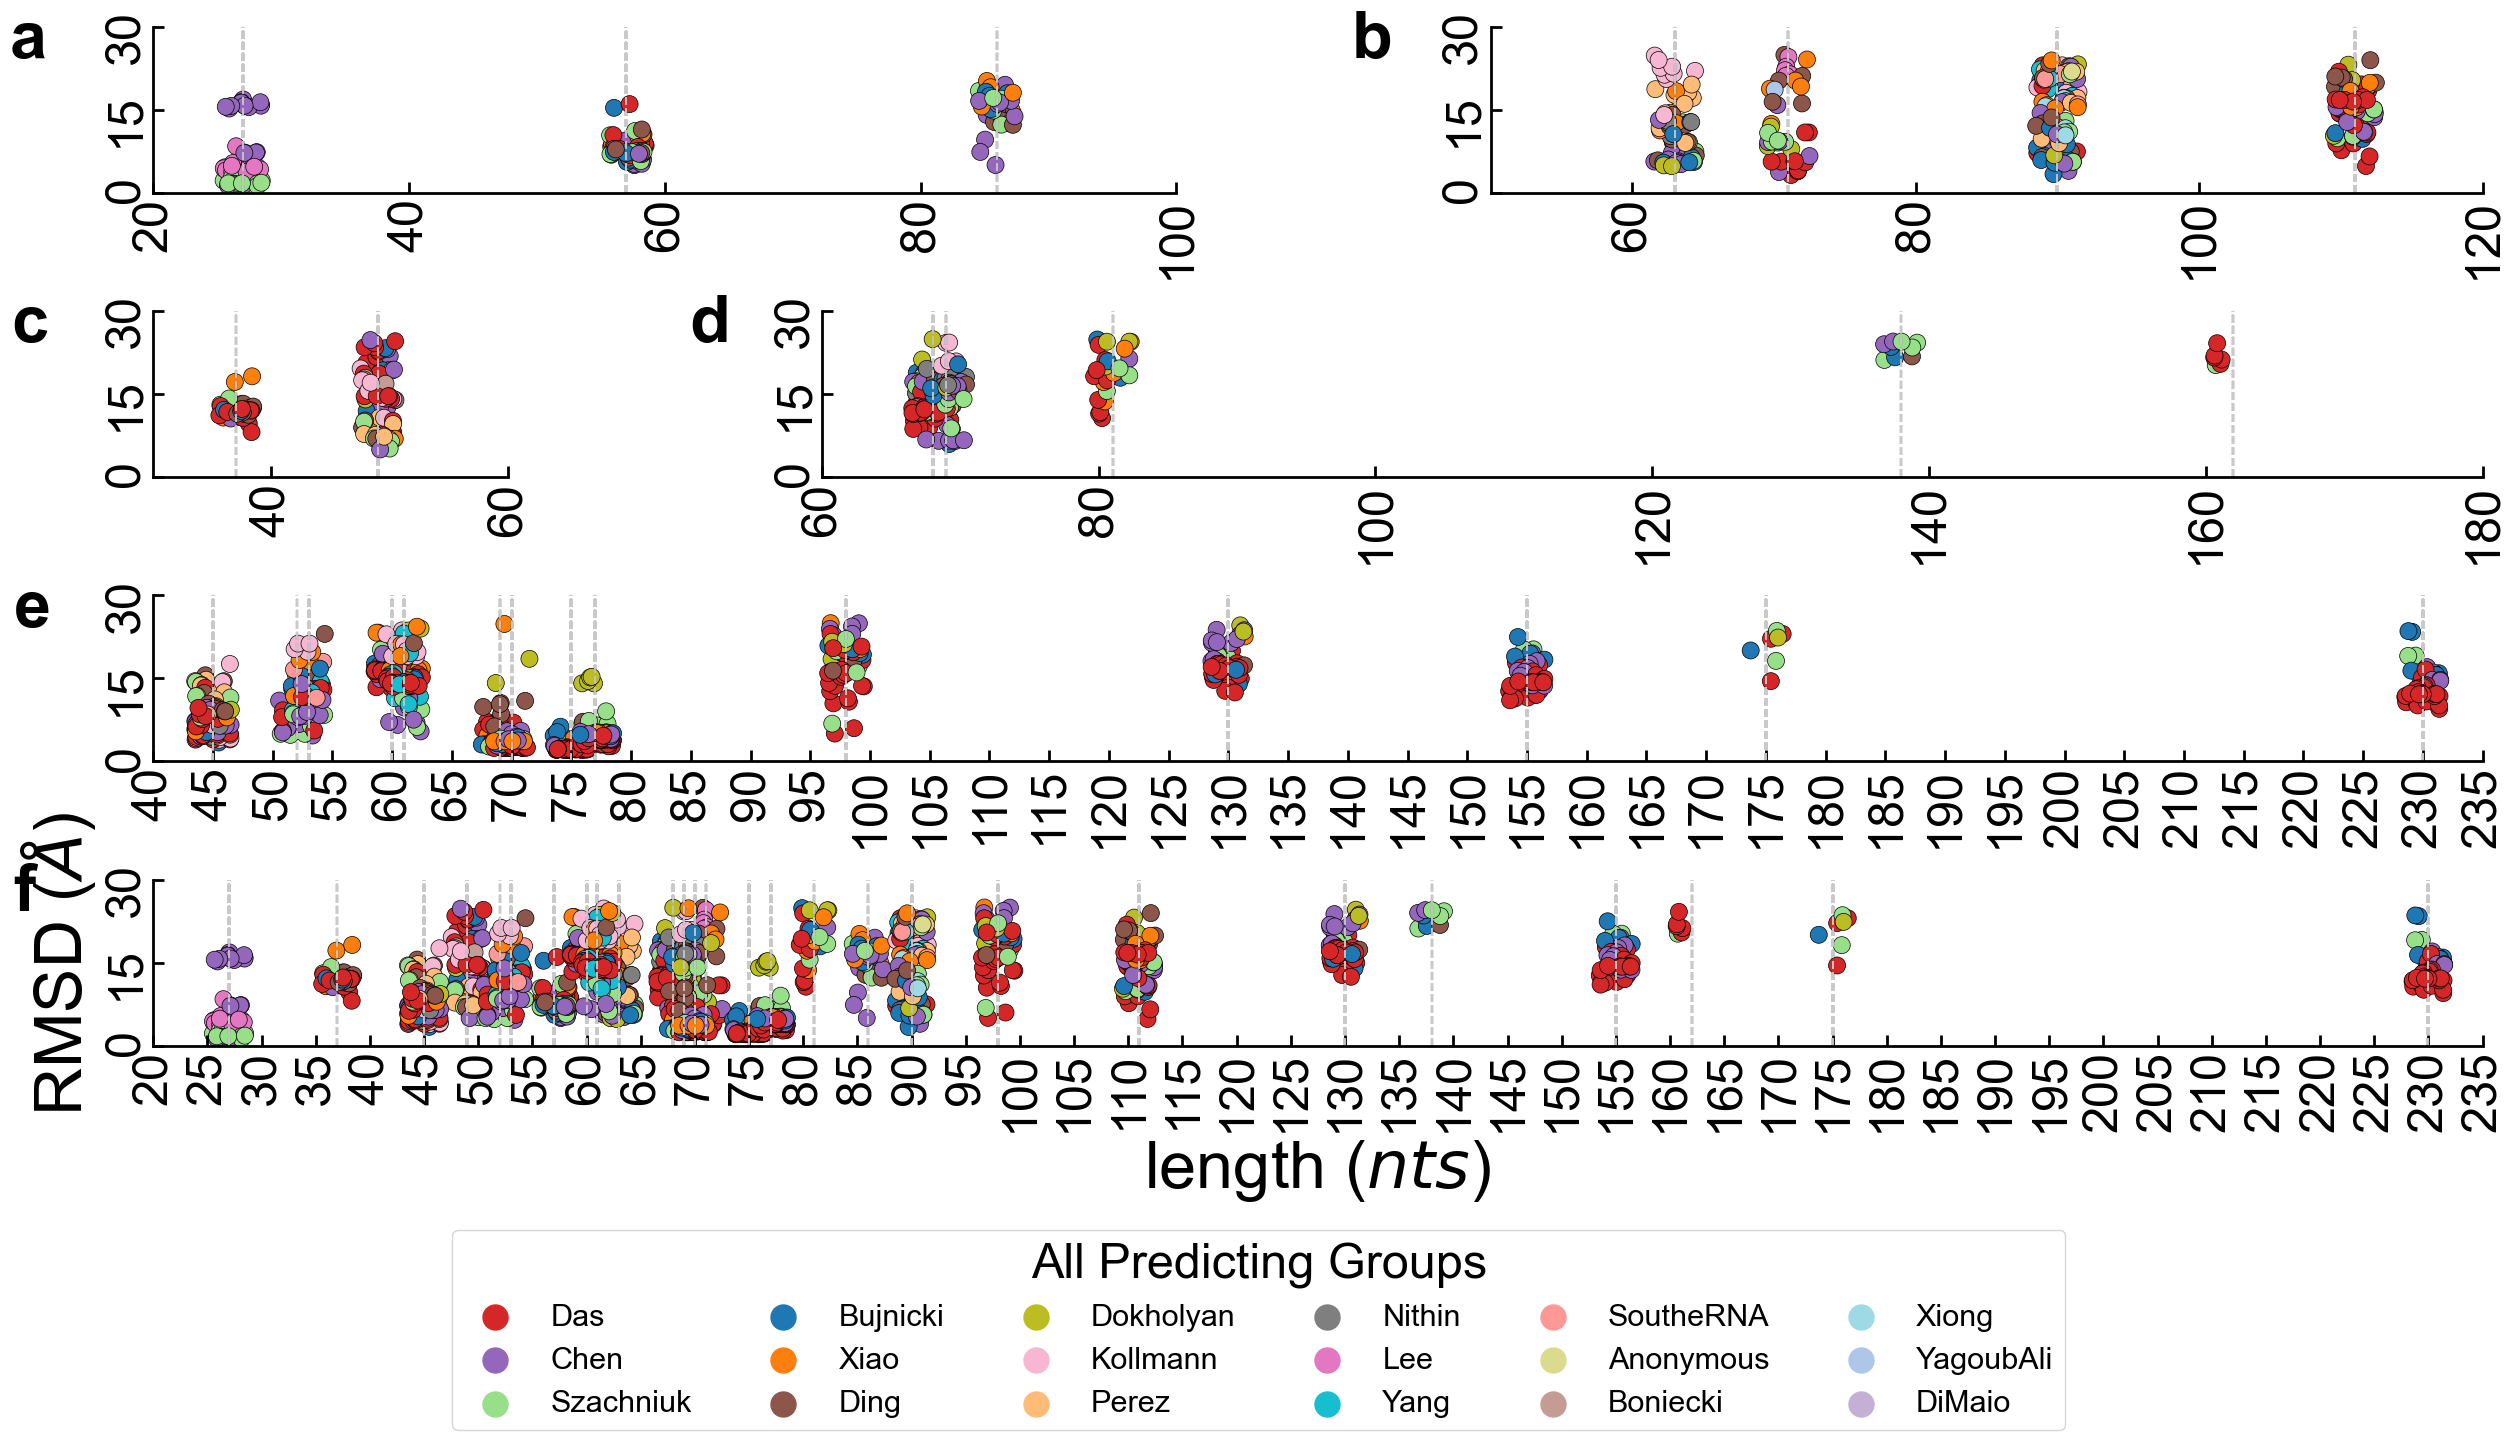

In [55]:


# Create a grid layout with 5 subgraphs
fig = plt.figure(constrained_layout=True, figsize=(25, 12),)
gs = gridspec.GridSpec(4, 4, figure=fig,wspace =0.05,hspace=0.05)
params={
    'font.family':'Arial',
    'font.size':35}
plt.rcParams.update(params)
sns.despine()
# Place subgraphs in the grid layout
ax1 = fig.add_subplot(gs[0, :2])
ax2 = fig.add_subplot(gs[0, 2:])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1:])
ax5 = fig.add_subplot(gs[2, :])
ax6 = fig.add_subplot(gs[3, :])


line_color='#c9c9c9'



# Scatterplotting
sns.scatterplot(x='length_shift', y='RMSD', data=df_RNA_elements[df_RNA_elements['RMSD'] <= 25], linewidth=0.5, ax=ax1,hue='Groups_new',palette=color_map,edgecolor='black',s=150)
# Setting labels and scales
ax1.set_ylim(0, 25)
ax1.tick_params(rotation=90)
ax1.set_xlim(20, 100)
ax1.legend_.remove()
for xi in df_RNA_elements['length']:
    ax1.axvline(x=xi, linestyle='--', color=line_color, alpha=0.1)


# Scatterplotting
sns.scatterplot(x='length_shift', y='RMSD', data=df_viral_elements[df_viral_elements['RMSD'] <= 25], linewidth=0.5, ax=ax2,hue='Groups_new',palette=color_map,edgecolor='black',s=150)

# Setting labels and scales
ax2.set_ylim(0, 25)
ax2.set_xlim(50, 120)
ax2.tick_params(rotation=90)
ax2.legend_.remove()
for xi in df_viral_elements['length']:
    ax2.axvline(x=xi, linestyle='--', color=line_color, alpha=0.1)


sns.scatterplot(x='length_shift', y='RMSD', data=df_aptamers[df_aptamers['RMSD'] <= 25], linewidth=0.5, ax=ax3,hue='Groups_new',palette=color_map,edgecolor='black',s=150)

ax3.set_ylim(0, 25)
ax3.set_xlim(30, 60)
ax3.tick_params(rotation=90)
ax3.legend_.remove()
for xi in df_aptamers['length']:
    ax3.axvline(x=xi, linestyle='--', color=line_color, alpha=0.1)

    
    
sns.scatterplot(x='length_shift', y='RMSD', data=df_ribozymes[df_ribozymes['RMSD'] <= 25], linewidth=0.5, ax=ax4,hue='Groups_new',palette=color_map,edgecolor='black',s=150)
ax4.legend_.remove()

ax4.set_xlim(60, 180)
ax4.set_ylim(0, 25)
ax4.tick_params(rotation=90)
for xi in df_ribozymes['length']:
    ax4.axvline(x=xi, linestyle='--', color=line_color, alpha=0.1)



sns.scatterplot(x='length_shift', y='RMSD', data=df_riboswitches[df_riboswitches['RMSD'] <= 25], linewidth=0.5, ax=ax5,hue='Groups_new',palette=color_map,edgecolor='black',s=150)


ax5.set_ylim(0, 25)
ax5.set_xlim(40, 235)
ax5.set_xticks(np.arange(40, 240, 5))
ax5.tick_params(rotation=90)
ax5.legend_.remove()
ax5.set_xlabel("length ($nts$)")
ax5.set_ylabel("RMSD ($\AA$)")
for xi in df_riboswitches['length']:
    ax5.axvline(x=xi, linestyle='--', color=line_color, alpha=0.1)



sns.scatterplot(x='length_shift', y='RMSD', data=df_human_sorted[df_human_sorted['RMSD'] <= 25], linewidth=0.5, ax=ax6,hue='Groups_new',palette=color_map,edgecolor='black',s=150)


ax6.set_ylim(0, 25)
ax6.set_xlim(20, 235)
ax6.set_xticks(np.arange(20, 240, 5))
ax6.tick_params(rotation=90)
ax6.legend_.remove()
ax6.set_xlabel("length ($nts$)",fontsize=48)
ax6.set_ylabel("RMSD ($\AA$)",fontsize=48)
for xi in df_human_sorted['length']:
    ax6.axvline(x=xi, linestyle='--', color=line_color, alpha=0.1)

    
    
    
    
# Show legend
# 1. get handles and labels for each subfigure ax
handles, labels = [], []

for ax in [ax1, ax2, ax3, ax4, ax5,ax6]:
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

# 2. & 3. Merge these handles and labels and de-weight them.
legend_dict = dict(zip(labels, handles))  # Use a dictionary to de-duplicate and keep the last occurrence of handle.
labels_unique = list(legend_dict.keys())
handles_unique = [legend_dict[label] for label in labels_unique]
# Show legend
#handles, labels = ax4.get_legend_handles_labels()
fig.legend(sort_legend(labels_unique,handles_unique)[0],sort_legend(labels_unique,handles_unique)[1], title="All Predicting Groups", loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=6, prop={'size': 22},markerscale=3)



for ax in [ax1, ax2, ax3, ax4,ax5]:
    ax.set_xlabel('')
    ax.set_ylabel('')
    
for ax in [ax1,ax2,ax3,ax4,ax5,ax6]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_yticks([0,15,30])
    ax.spines['left'].set_linewidth(2)   # Left axis
    ax.spines['bottom'].set_linewidth(2)  # Right axis
    ax.tick_params(axis='both',          # Applied to the x- and y-axes
               direction='in',       # Scale lines facing inwards
               length=8,            # Length of the scale
               width=2)             # Thickness of the scale


    


# Show subgraph labels
ax1.text(-0.19, 1.1, 'a', transform=ax1.transAxes, fontsize=48, verticalalignment='top', horizontalalignment='left',fontweight='bold')
ax2.text(-0.14, 1.1, 'b', transform=ax2.transAxes, fontsize=48, verticalalignment='top', horizontalalignment='left',fontweight='bold')
ax3.text(-0.55, 1.1, 'c', transform=ax3.transAxes, fontsize=48, verticalalignment='top', horizontalalignment='left',fontweight='bold')
ax4.text(-0.08, 1.1, 'd', transform=ax4.transAxes, fontsize=48, verticalalignment='top', horizontalalignment='left',fontweight='bold')
ax5.text(-0.08, 1.1, 'e', transform=ax5.transAxes, fontsize=48, verticalalignment='top', horizontalalignment='left',fontweight='bold')
ax6.text(-0.08, 1.1, 'f', transform=ax6.transAxes, fontsize=48, verticalalignment='top', horizontalalignment='left',fontweight='bold')





#plt.savefig("/Users/bf/Documents/1doctor/RoundV_all/bFigures/Main_figure/Figure4/Figure4_human_scatter.png",dpi=600,bbox_inches='tight') 
plt.savefig("/Users/bf/Documents/GitHub/PuzzlesRoundV/figures/Figure3/Figure3_pannelA.pdf",bbox_inches='tight') 
plt.show()

# Figure3: Panel B

In [73]:
def filter_min_rmsd_rank(df):
    """
    Group the PZ columns of df, within each PZ group, then group them according to group_new, and then keep only the rows with the smallest RMSD_rank in each subgroup.

    Args.
        df (DataFrame): a DataFrame with PZ, group_new and RMSD_rank columns.

    Returns.
        DataFrame: A new DataFrame consisting of the rows with the smallest RMSD_rank in each PZ and group_new combination.
    """
    
    return df.loc[df.groupby(['PZ', 'Groups_new'])['RMSD_rank'].idxmin()].reset_index(drop=True)
def transform_df(df):
    """
    Converts each value in the DataFrame: subtracts each value from 6 and converts to 0 if the result is negative.
    If the original value is NaN, leave it unchanged.

    Args.
        df (DataFrame): The original DataFrame.

    Returns.
        DataFrame: The converted DataFrame.
    """
    def transform_value(value):
        if pd.isna(value):
            return value
        return max(0, 6 - value)
    
    return df.applymap(transform_value)

In [74]:
#Read the RMSD score in human and server respectively.
df_humanRMSD=pd.read_csv('/Users/bf/Documents/GitHub/PuzzlesRoundV/scores/Figure3/df_humanRMSD.csv')
df_serverRMSD=pd.read_csv('/Users/bf/Documents/GitHub/PuzzlesRoundV/scores/Figure3/df_serverRMSD.csv')


In [75]:
#Only the model with the smallest RMSD value in each group was retained in each Puzzles as the representative model for that group and included in the scoring process.
df_humanRMSD_extract=filter_min_rmsd_rank(df_humanRMSD)
df_serverRMSD_extract=filter_min_rmsd_rank(df_serverRMSD)


In [76]:
# Get the unique value of the PZ column, keeping the original order
puzzle_order=['PZ11','PZ16a','PZ16b','PZ30','PZ23','PZ32',
              'PZ18','PZ24','PZ31','PZ39',
              'PZ22','PZ22Dimer','PZ34','PZ35','PZ36',
              'PZ25','PZ26','PZ26tBox','PZ26tRNA','PZ27','PZ27tBox','PZ27tRNA','PZ28','PZ28tBox','PZ28tRNA','PZ29','PZ33','PZ37','PZ38']

# Creating Pivot Tables
pivot_df_humanRMSD_extratc = df_humanRMSD_extract.pivot_table(
    index='Groups_new', 
    columns='PZ', 
    values='RMSD_rank', 
    dropna=False
)

# Resequencing in the original PZ order.
pivot_df_humanRMSD_extratc = pivot_df_humanRMSD_extratc.reindex(columns=puzzle_order)
pivot_df_serverRMSD_extratc = df_serverRMSD_extract.pivot_table(
    index='Groups_new', 
    columns='PZ', 
    values='RMSD_rank', 
    dropna=False
)
pivot_df_serverRMSD_extratc = pivot_df_serverRMSD_extratc.reindex(columns=puzzle_order)


In [77]:
pivot_df_humanRMSD_extratc=transform_df(pivot_df_humanRMSD_extratc.copy())
pivot_df_serverRMSD_extratc=transform_df(pivot_df_serverRMSD_extratc.copy())

In [78]:
column_=['PZ11', 'PZ16a', 'PZ16b', 'PZ30', 'PZ23', 'PZ32', 'PZ18', 'PZ24',
       'PZ31', 'PZ39', 'PZ22', 'PZ22Dimer', 'PZ34', 'PZ35', 'PZ36', 'PZ25',
       'PZ26', 'PZ26tBox', 'PZ26tRNA', 'PZ27', 'PZ27tBox', 'PZ27tRNA', 'PZ28',
       'PZ28tBox', 'PZ28tRNA', 'PZ29', 'PZ33', 'PZ37', 'PZ38']
def add_value_column(df):
    # Calculate sum_all for each row (sum of all columns)
    df['sum_all'] = df[column_].sum(axis=1)

    # Calculate num (number of non-NaN values) per line
    df['num'] = df[column_].count(axis=1)

    # Apply the formula to calculate the value column
    df['value'] = df['sum_all'] * df['num'] / 29

    return df

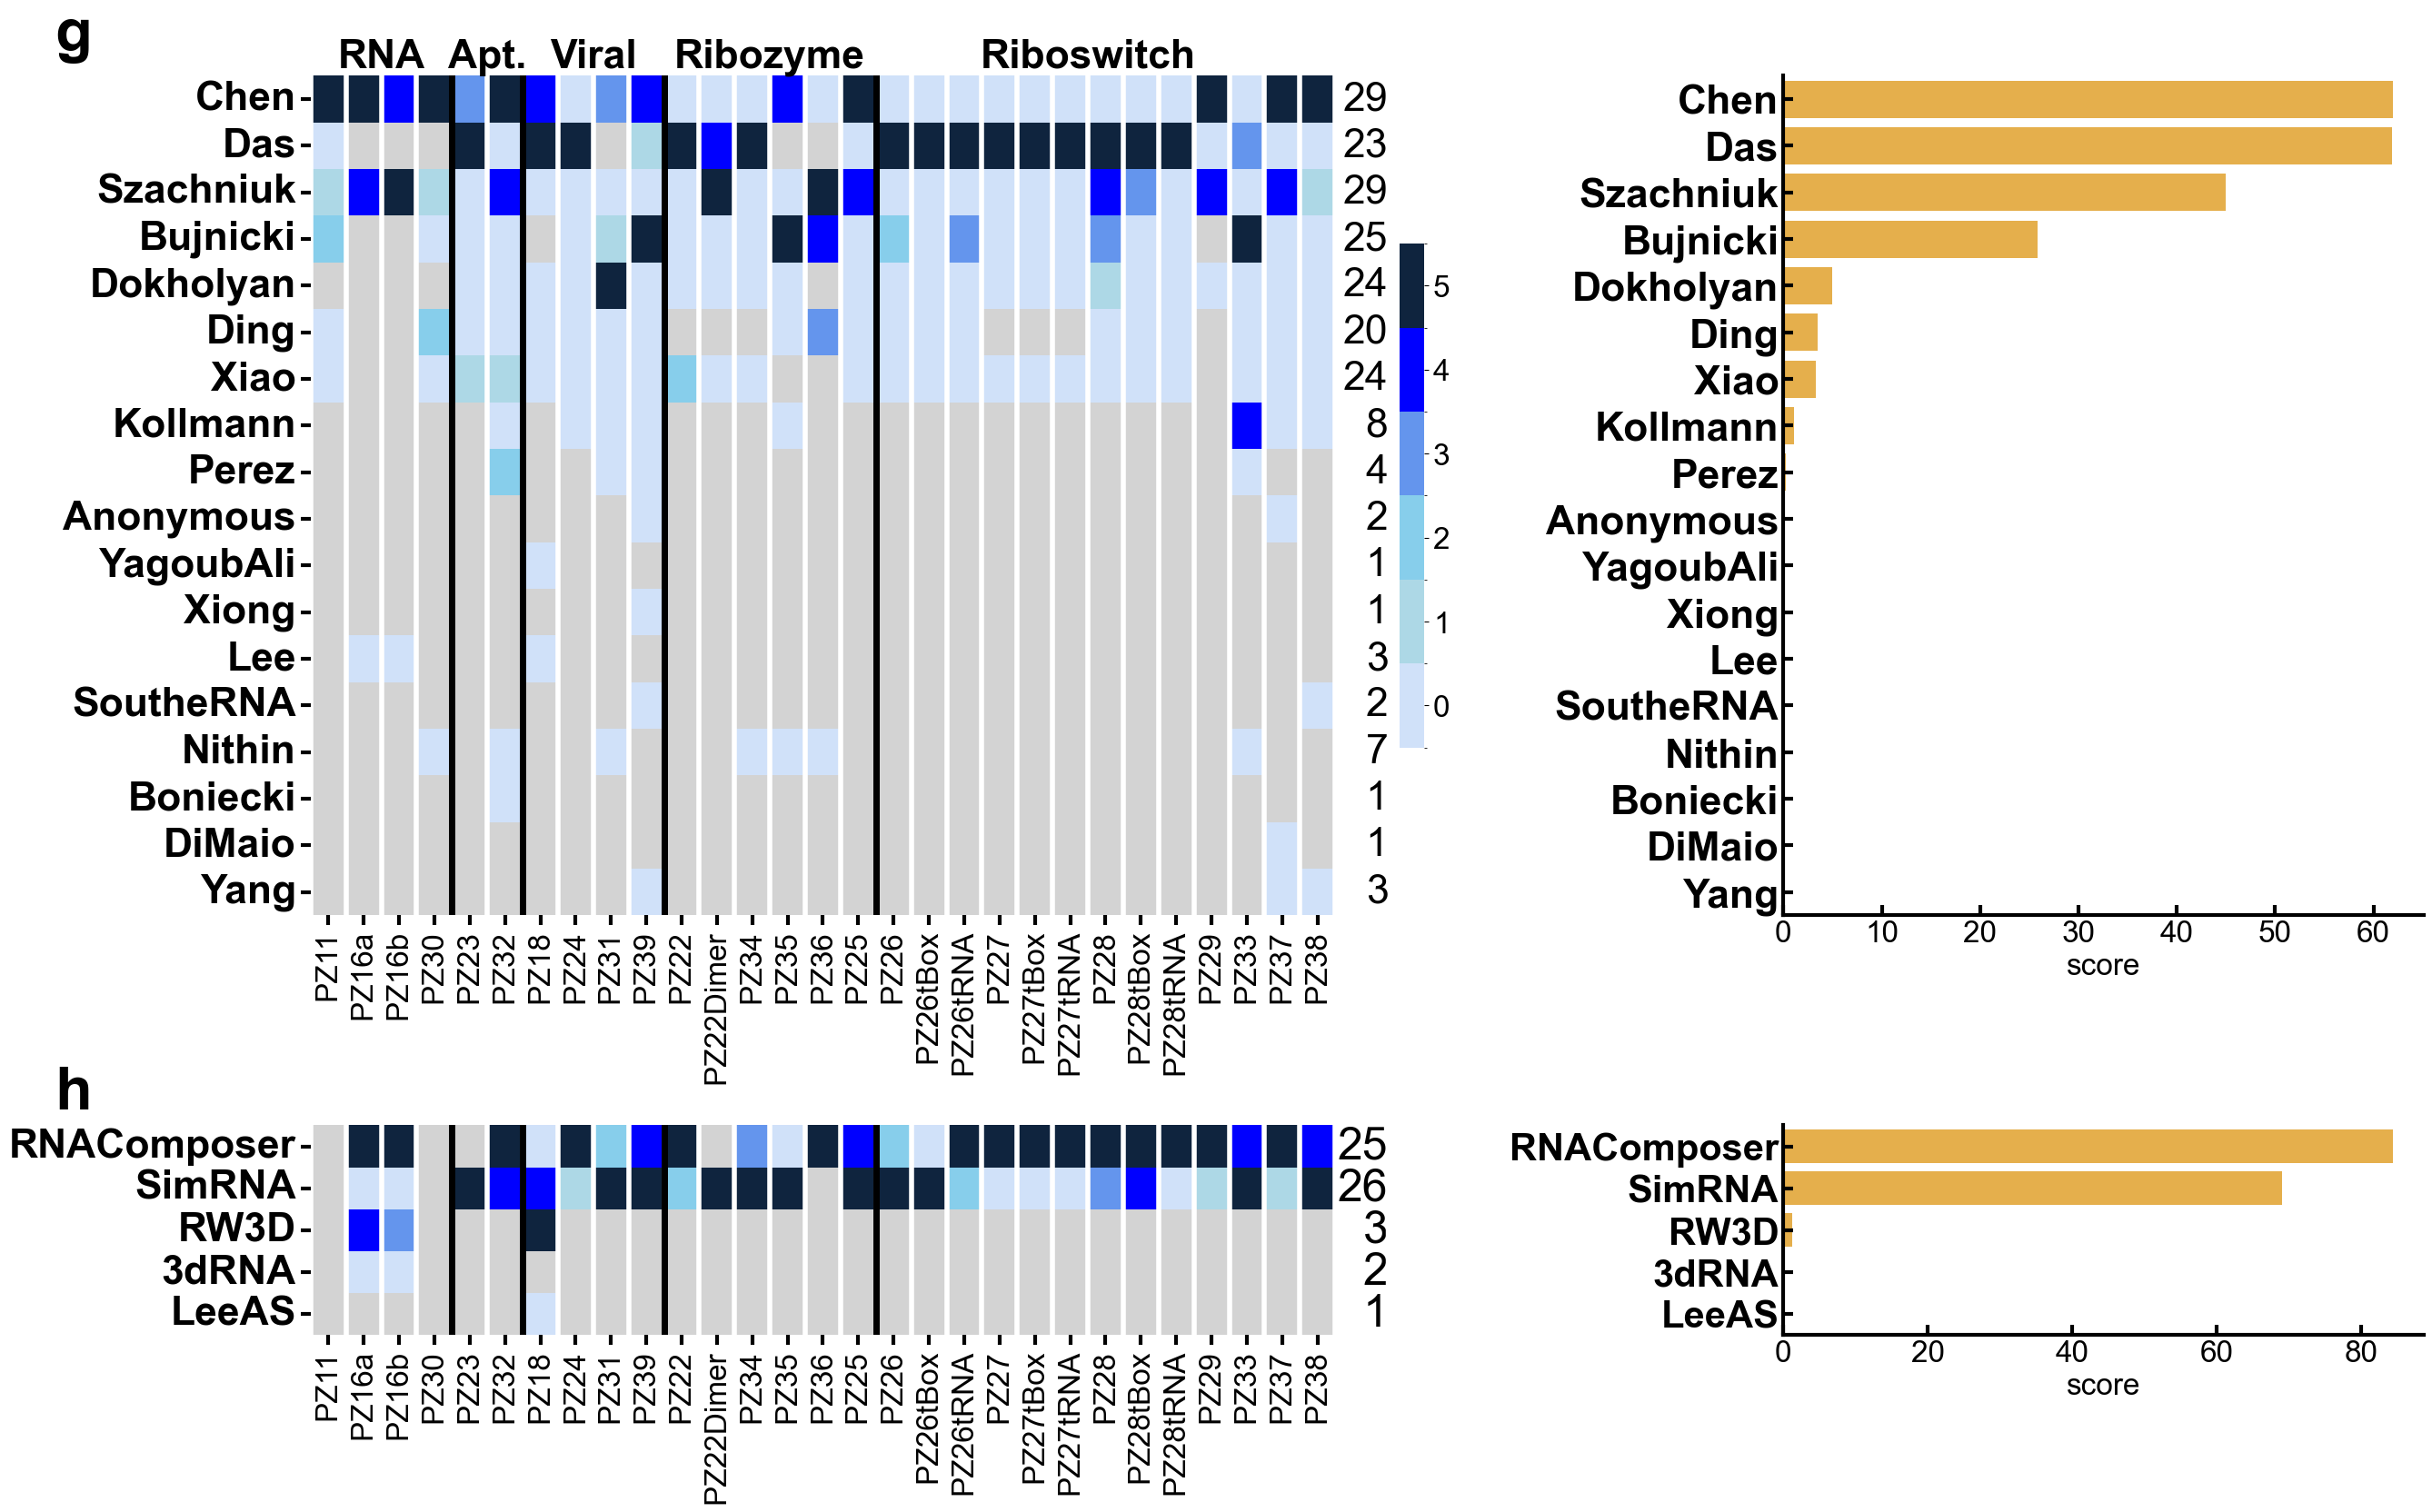

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm,LinearSegmentedColormap
import numpy as np
params={
    'font.family':'Arial',
    'font.size':24}
plt.rcParams.update(params)

fig, axes = plt.subplots(2, 2, figsize=(30, 18), gridspec_kw={'width_ratios': [2, 1],'height_ratios': [4, 1]})
fig.subplots_adjust(wspace=0.2,hspace=0.4)
pivot_df_humanRMSD_extratc=add_value_column(pivot_df_humanRMSD_extratc)

# Sorting a DataFrame by the 'Total' column
pivot_df_humanRMSD_extratc.sort_values(by='value', ascending=False, inplace=True)
pivot_df_humanRMSD_extratc_reset = pivot_df_humanRMSD_extratc.reset_index()
human_num=pivot_df_humanRMSD_extratc_reset['num']
# Call the barh method on the axis object to draw horizontal bars.
sns.barplot(x='value', y='Groups_new', data=pivot_df_humanRMSD_extratc_reset,color='#ffb732',ax=axes[0,1])
axes[0,1].set_yticklabels(labels=axes[0,1].get_yticklabels(),rotation = 0, size=32,fontweight='bold')
axes[0,1].set_xlabel('score')  # x-axis labels
axes[0,1].set_ylabel('')        # y-axis labels



# If you don't want to show the 'Total' column in the heatmap, you can remove it before plotting.
pivot_df_humanRMSD_extratc.drop(columns=['sum_all','num','value'], inplace=True)

# Defining the colour mapping
cmap = LinearSegmentedColormap.from_list(
    'custom_blue', 
    ['#d0e1f9', '#add8e6', '#87ceeb', '#6495ed', '#0000ff', '#0f243e'], 
    N=6
)

# Define the boundaries of the colour scale
bounds = np.arange(-0.5, 6, 1)
norm = BoundaryNorm(bounds, cmap.N)

# Setting up the heat map
axes[0,0].set_facecolor('lightgrey')
mask = np.isnan(pivot_df_humanRMSD_extratc)
g=sns.heatmap(pivot_df_humanRMSD_extratc, cmap=cmap, norm=norm, ax=axes[0,0], 
            cbar_kws={'shrink': 0.6, 'ticks': np.arange(0, 6)}, mask=mask, )
g.set_ylabel('')
g.set_xlabel('')
g.set_yticklabels(labels=g.get_yticklabels(),rotation = 0, size=32,fontweight='bold')
for i in range(pivot_df_humanRMSD_extratc.shape[1]+1):
    g.axvline(i, color='white', lw=4)

# Annotate text above each category
category_centers = {2: "RNA",#4
                    5: "Apt.",#2
                    8: "Viral",#4
                    13 : "Ribozyme",#6
                    22 : "Riboswitch"#14
                    }

for center in category_centers:
    g.text(center, -0.4, category_centers[center], ha="center", va="center", color="black", size=32, fontweight='bold')
# Add text to the right border
assert len(human_num) == pivot_df_humanRMSD_extratc.shape[0], "The length of the text list must be the same as the number of lines"

# Add text to the right side of each line
for i, text in enumerate(human_num):
    x_coord = pivot_df_humanRMSD_extratc.shape[1] + 1.5  # x-coordinate, slightly beyond the far right of the heatmap
    y_coord = i+0.5  # y coordinate, corresponding to each row

    g.text(x_coord, y_coord, text, va="center", ha="right", color="black", size=32)



gaps_to_draw = [4,6,10,16]
for gap in gaps_to_draw:
    g.axvline(gap, color='black', lw=5)

    
axes[0,1].spines['right'].set_visible(False)
axes[1,1].spines['right'].set_visible(False)
axes[0,1].spines['top'].set_visible(False)
axes[1,1].spines['top'].set_visible(False)
axes[0,0].text(-0.25, 1.08, "g", transform=axes[0,0].transAxes,va='top', ha='left',fontweight='bold',fontsize=48)
axes[1,0].text(-0.25, -0.18, "h", transform=axes[0,0].transAxes,va='top', ha='left',fontweight='bold',fontsize=48)



######################
pivot_df_serverRMSD_extratc=add_value_column(pivot_df_serverRMSD_extratc)

# Sort the DataFrame based on the 'Total' column
pivot_df_serverRMSD_extratc.sort_values(by='value', ascending=False, inplace=True)
pivot_df_serverRMSD_extratc_reset = pivot_df_serverRMSD_extratc.reset_index()
server_num=pivot_df_serverRMSD_extratc_reset['num']
# Call the barh method on the axis object to draw a horizontal bar chart
sns.barplot(x='value', y='Groups_new', data=pivot_df_serverRMSD_extratc_reset,color='#ffb732',ax=axes[1,1])
axes[1,1].set_yticklabels(labels=axes[1,1].get_yticklabels(),rotation = 0, size=30,fontweight='bold')
axes[1,1].set_xlabel('score')  # x-axis label
axes[1,1].set_ylabel('')        # y-axis label

# If you don't want the 'Total' column to appear in the heatmap, you can delete it before plotting
pivot_df_serverRMSD_extratc.drop(columns=['sum_all','num','value'], inplace=True)



# Set up heatmap
axes[1,0].set_facecolor('lightgrey')

mask = np.isnan(pivot_df_serverRMSD_extratc)
g2=sns.heatmap(pivot_df_serverRMSD_extratc, cmap=cmap, norm=norm, ax=axes[1,0], 
            cbar_kws={'shrink': 0.6, 'ticks': np.arange(0, 6)}, mask=mask,cbar=True)
g2.set_ylabel('')
g2.set_xlabel('')
g2.set_yticklabels(labels=g2.get_yticklabels(),rotation = 0, size=32,fontweight='bold')
for i in range(pivot_df_serverRMSD_extratc.shape[1]+1):
    g2.axvline(i, color='white', lw=4)







for gap in gaps_to_draw:
    g.axvline(gap, color='black', lw=5)
    

for gap in gaps_to_draw:
    g2.axvline(gap, color='black', lw=5)

cbar_ax = g2.collections[0].colorbar.ax
pos = cbar_ax.get_position()

# Calculate the size and position of the rectangle used to cover the color scale and scale
# Increase the width and height of the rectangle to ensure the tick values are covered
new_width = pos.width * 8.5
new_height = pos.height * 1.1
new_x = pos.x0 - (new_width - pos.width) / 3.5
new_y = pos.y0 - (new_height - pos.height) / 2

# Draw a white rectangle at the location of the color scale to cover it and its scale values
fig.patches.extend([plt.Rectangle((new_x, new_y), new_width, new_height, 
                                  fill=True, color='white', transform=fig.transFigure, figure=fig)])

assert len(server_num) == pivot_df_serverRMSD_extratc.shape[0], "文本列表的长度必须与行数相同"

# Add text to the right of each line
for i, text in enumerate(server_num):
    x_coord = pivot_df_serverRMSD_extratc.shape[1] + 1.5  # x coordinate, slightly beyond the rightmost side of the heatmap
    y_coord = i+0.5  # y coordinate, corresponding to each row

    g2.text(x_coord, y_coord, text, va="center", ha="right", color="black", size=36)





for ax in [axes[0,1],axes[1,1]]:
    ax.spines['left'].set_linewidth(3)   # Left axis
    ax.spines['bottom'].set_linewidth(3)  # right axis
    ax.tick_params(axis='both',          # Applies to x-axis and y-axis
               direction='in',       # The tick mark faces inward
               length=8,            # The length of the tick mark
               width=3)              # The thickness of the tick marks

for ax in [axes[0,0],axes[1,0]]:
    ax.tick_params(axis='both',          # Applies to x-axis and y-axis
               direction='out',       # The tick mark faces inward
               length=8,            # The length of the tick mark
               width=3)          


plt.savefig("/Users/bf/Documents/GitHub/PuzzlesRoundV/figures/Figure3/Figure3_pannelB.pdf", bbox_inches='tight')
plt.show()

In [10]:
puzzle_color_selected= {'PZ11': '#9900B3', 'PZ16a': '#C266D1', 'PZ16b': '#6C00BF', 'PZ30': '#A700FF', 'PZ23': '#D6C300', 'PZ32': '#FFBB33', 'PZ18': '#00A863', 'PZ24': '#29E043', 'PZ31': '#53D385', 'PZ39': '#1E806D', 'PZ22': '#FF00FF', 'PZ22Dimer': '#AF00E6', 'PZ34': '#FF00B3', 'PZ35': '#B3128A', 'PZ36': '#FF4DC1', 'PZ25': '#00B8C3', 'PZ26': '#006091', 'PZ26tBox': '#5C89CC', 'PZ26tRNA': '#74A0FF', 'PZ27': '#74CAFF', 'PZ27tBox': '#69A8E6', 'PZ27tRNA': '#578EBF', 'PZ28': '#1F6666', 'PZ28tBox': '#2B7880', 'PZ28tRNA': '#388899', 'PZ29': '#266180', 'PZ33': '#494566', 'PZ37': '#336D99', 'PZ38': '#254566'}

# Figure6

In [7]:
df_fig6=pd.read_csv('/Users/bf/Documents/GitHub/PuzzlesRoundV/scores/Figure6/metrix_all_submitted_predicted_models')

In [4]:

def generate_lowercase_list(nums):
    product = 1
    for num in nums:
        product *= num
    
    alphabet = list(string.ascii_lowercase)
    result = alphabet[:product]
    return result


def striplot_drawing_addline(lay_list, info_dic):
    params={
    'font.family':'Arial',
    'font.size':12}
    plt.rcParams.update(params)
    #plt.rcParams['font.size'] = 10 When there are a small number of parameters, you can set them directly
    fig = plt.figure(constrained_layout=True, figsize=info_dic['figure_size'][0])
    gs = gridspec.GridSpec(lay_list[0], lay_list[1], figure=fig)
    label_li = generate_lowercase_list(lay_list)
    num = 0
    axes_dict = {}
    for i in range(lay_list[0]):
        for j in range(lay_list[1]):
            num += 1
            ax = fig.add_subplot(gs[i, j])
            axes_dict[f"ax{num}"] = ax
    sns.despine()  #removing the top and right border lines   
    for i, ax_key in enumerate(axes_dict.keys()):
        ax = axes_dict[ax_key]
       
        ax = sns.stripplot(x=info_dic[ax_key][0], y=info_dic[ax_key][1], data=info_dic[ax_key][3],
                           linewidth=0.5,palette=info_dic['color'][0], ax=ax)
        ax.set_xlabel(info_dic[ax_key][2])
        ax.tick_params(rotation=90)
        ax.set_ylim(info_dic[ax_key][4])
        ax.set_ylabel(info_dic[ax_key][5])
        #ax.set_yticks(ticks=info_dic[ax_key][11], labels=info_dic[ax_key][11],rotation=70)
        ax.set_yticks(ticks=info_dic[ax_key][11])
        ax.set_yticklabels(labels=info_dic[ax_key][11], rotation=90)
        #ax.set_yticklabels(info_dic[ax_key][11])
        
        ax.annotate(label_li[i], (-4, 1.05), size=16, xycoords=ax.get_xaxis_transform(), weight='bold')
       
        #Add line:
        if info_dic[ax_key][6]=='yes':
            # Calculate the relative position of y=3 within the y-axis range
            ymin, ymax = ax.get_ylim()
            for i in range(info_dic[ax_key][7]):
                y_fraction = (info_dic[ax_key][9][i] - ymin) / (ymax - ymin)
                ax.annotate('', xy=(1.06, y_fraction), xycoords='axes fraction', xytext=(0, y_fraction),
                            textcoords='axes fraction', arrowprops=dict(arrowstyle='-', color=info_dic[ax_key][8][i],linewidth=info_dic[ax_key][10][i]))
        #ax.legend_.remove()
  
    fig.tight_layout()
    
    plt.subplots_adjust(wspace =0.2, hspace =0.9)#Adjust sub-picture spacing
    plt.savefig(info_dic['pdf_name'][0],bbox_inches='tight') 
    plt.show()

    


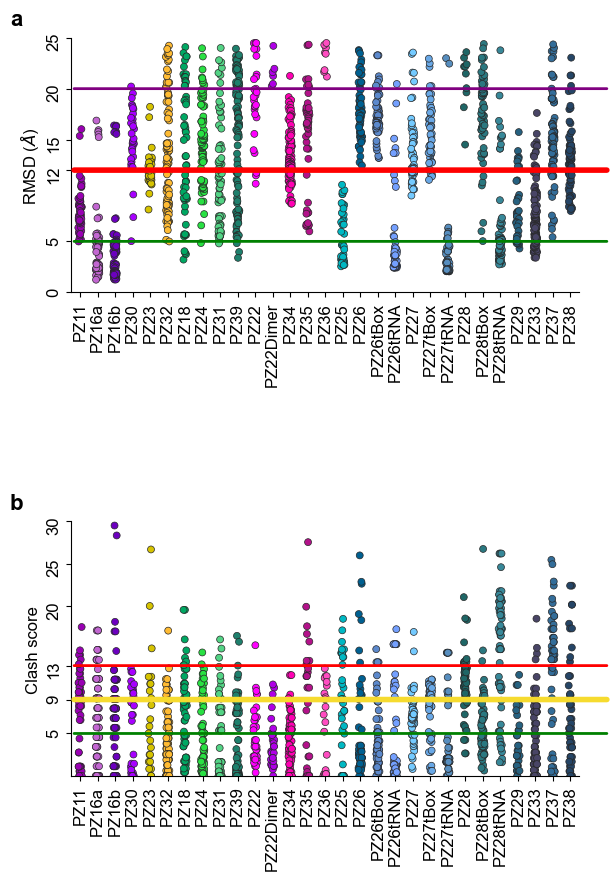

In [21]:
lay_list = [2, 1]
info_dic = {"ax1": ['PZ', 'RMSD', '', df_fig6[df_fig6['RMSD'] <= 24.5], [0, 25], 'RMSD ($\AA$)','yes',3,['green','red','purple'],[5,12,20],[2,4,2],[0,5,12,15,20,25]],
            "ax2": ['PZ', 'clash', '', df_fig6[df_fig6['clash']<=30], [0, 30], 'Clash score','yes',3,['green','#F6DB2F','red'],[5,9,13],[2,4,2],[5,9,13,20,25,30]],
            'color': [puzzle_color_selected],
            'figure_size':[(6, 9)],
            ''
            'pdf_name':["/Users/bf/Documents/GitHub/PuzzlesRoundV/scores/Figure6/Figure6jupyter_all_rmsd_clash.pdf"]
}
striplot_drawing_addline(lay_list, info_dic)